In [4]:
import os
import pandas as pd
import seaborn as sns
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score

# Same random seed state
np.random.seed(42)


In [5]:
url_file = r'Datasets\Question-3\airfoil.csv'
columns = ['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']

features = ['frequency','angle_of_attack', 
            'chord_length', 
            'free_stream_velocity',
            'suction_side_displacement_thickness']

filename=r'airfoil.csv'
airfoil_dataset = pd.read_csv(filename)
airfoil_dataset.columns = ['frequency','aoa','chord_length','fs_velocity','ssd_thickness',
              'ssp_level'] 


In [6]:
airfoil_dataset.head()

frequency   aoa  chord_length  fs_velocity  ssd_thickness  ssp_level
0     6300.0   0.0        0.0508         55.5       0.000762    132.796
1      400.0   4.0        0.2286         55.5       0.004286    123.274
2     1250.0  15.4        0.0508         39.6       0.028259    126.743
3      800.0   7.3        0.2286         39.6       0.012348    126.299
4      500.0  12.7        0.0254         71.3       0.012181    126.898

In [7]:
airfoil_dataset.tail()

frequency   aoa  chord_length  fs_velocity  ssd_thickness  ssp_level
1196     3150.0   5.4        0.1524         31.7       0.005255    118.291
1197     2500.0  19.7        0.0508         39.6       0.036484    116.184
1198      800.0   2.0        0.2286         55.5       0.003135    128.492
1199     3150.0   3.3        0.1016         71.3       0.002028    132.114
1200      630.0   4.0        0.3048         39.6       0.005796    131.073

In [8]:
airfoil_dataset.describe()

frequency          aoa  chord_length  fs_velocity  ssd_thickness  \
count   1201.000000  1201.000000   1201.000000  1201.000000    1201.000000   
mean    2933.846794     6.659867      0.139922    50.838551       0.010972   
std     3178.398205     5.802506      0.094812    15.543351       0.013086   
min      200.000000     0.000000      0.025400    31.700000       0.000401   
25%      800.000000     2.000000      0.050800    39.600000       0.002535   
50%     1600.000000     5.300000      0.101600    39.600000       0.004957   
75%     4000.000000     9.900000      0.228600    71.300000       0.014072   
max    20000.000000    22.200000      0.304800    71.300000       0.058411   

         ssp_level  
count  1201.000000  
mean    124.736598  
std       6.962995  
min     103.380000  
25%     120.136000  
50%     125.727000  
75%     129.937000  
max     140.987000

In [9]:
airfoil_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 6 columns):
frequency        1201 non-null float64
aoa              1201 non-null float64
chord_length     1201 non-null float64
fs_velocity      1201 non-null float64
ssd_thickness    1201 non-null float64
ssp_level        1201 non-null float64
dtypes: float64(6)
memory usage: 56.4 KB


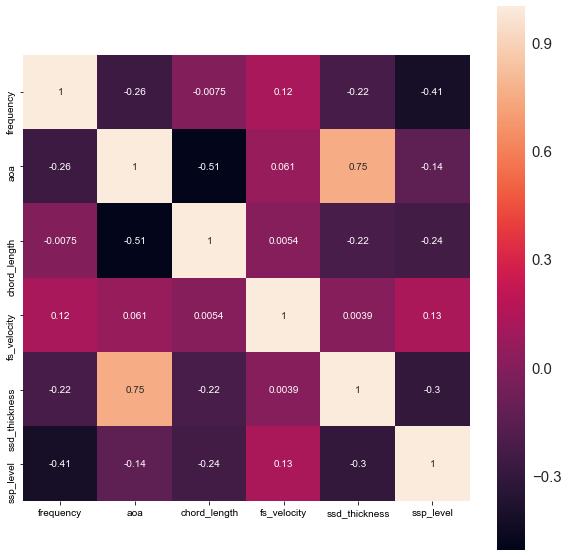

In [10]:
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(airfoil_dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [11]:
train_data = airfoil_dataset.copy()
train_set = train_data.drop("ssp_level", axis = 1)
train_labels = train_data["ssp_level"].copy()

In [12]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(5, 7))
    for col in col_list:
        plt.plot(airfoil_dataset[col],airfoil_dataset['ssd_thickness'],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.show()
cols=['frequency','aoa','chord_length','fs_velocity','ssd_thickness']

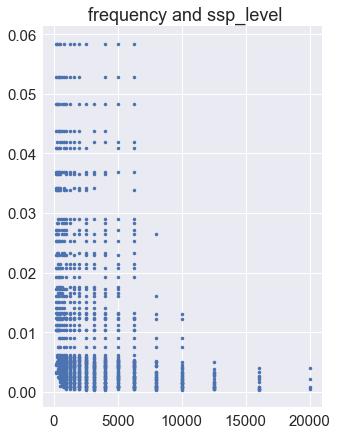

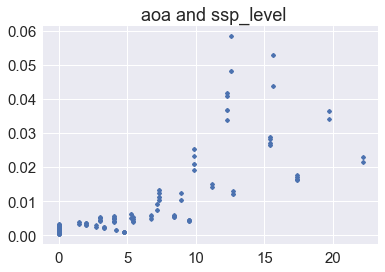

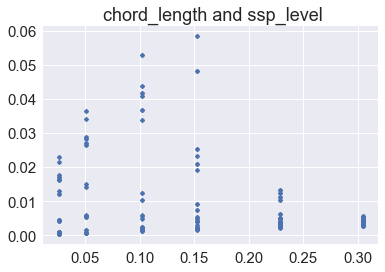

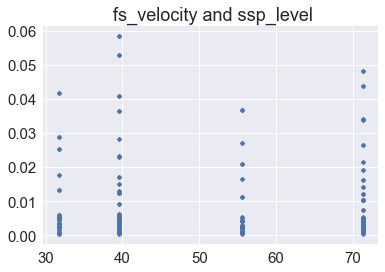

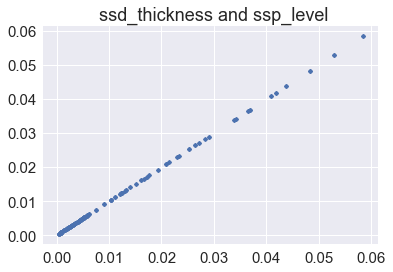

In [13]:
plotFeatures(cols," %s and ssp_level")

In [14]:
train_labels.values

array([ 132.796,  123.274,  126.743, ...,  128.492,  132.114,  131.073])

In [15]:
sc = StandardScaler()
train_set= sc.fit_transform(train_set)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_set, 
                                                    train_labels, 
                                                    test_size=0.2)

In [17]:
regressor =LinearRegression(n_jobs=4,normalize=False)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [18]:
W=[ float("%.4f" % float(item)) for item in regressor.coef_]
W.insert(0,float("%.4f" % float(regressor.intercept_)))

In [19]:
y_pred=regressor.predict(X_test)

In [20]:

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Square: ', r2_score(y_test,y_pred))

print("The linear model is:\n ssp_level= {:.5} + {:.5}*freq + {:.5}*aoa +{:.5}*chord_length + {:.5}*fs_velocity+ {:.5}*ssd_thickness".format(W[0], W[1], W[2], W[3], W[4],W[5]))


Mean Absolute Error:  3.63184267952
Mean Squared Error:  21.2282897248
Root Mean Squared Error:  4.60741681692
R Square:  0.555963116348
The linear model is:
 ssp_level= 124.71 + -4.072*freq + -2.2557*aoa +-3.3188*chord_length + 1.496*fs_velocity+ -2.0121*ssd_thickness


In [21]:
from airfoil import Airfoil

In [22]:
learning_rate=0.01 
tolerance=0.02
epochs=2000

ar=Airfoil(learning_rate, tolerance, epochs,random_state)
W,costs=ar.train(X_train, y_train)
y_pred=ar.predict(X_test)

In [23]:
print('\nIMPLEMENTATION OUTPUT')
print('=============')
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Square: ', r2_score(y_test,y_pred))

print("The linear model is:\n ssp_level= {:.5} + {:.5}*ssp_level + {:.5}*aoa + {:.5}*chord_length + {:.5}*fs_velocity+ {:.5}*ssd_thickness".format(W[0], W[1], W[2], W[3], W[4],W[5]))



IMPLEMENTATION OUTPUT
Mean Absolute Error:  3.63655096355
Mean Squared Error:  21.2507775514
Root Mean Squared Error:  4.60985656517
R Square:  0.555492733451
The linear model is:
 ssp_level= 124.71 + -4.0594*ssp_level + -2.1602*aoa + -3.2769*chord_length + 1.4866*fs_velocity+ -2.0842*ssd_thickness


Text(0.5,1,'Error vs. Training Epoch')

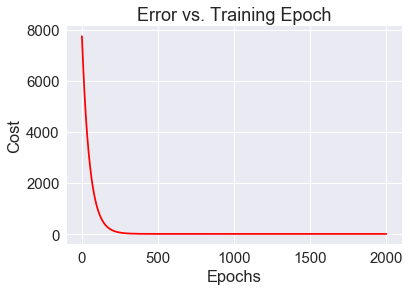

In [24]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epochs), costs, 'r')  
ax.set_xlabel('Epochs')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

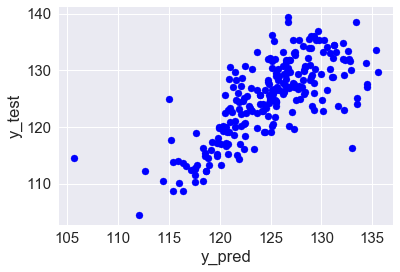

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(y_pred,y_test,  c='b', marker='o')
ax.set_xlabel('y_pred')
ax.set_ylabel('y_test')
plt.show()

In [29]:
def plotConvergence(epochs, costs,learning_rate):    
    plt.plot(np.arange(epochs), costs,label='lr='+str(learning_rate))  
    plt.xlabel('Epochs')      
    plt.ylabel('Cost')  
    plt.title('Error vs. Training Epoch')
    plt.legend(loc='best')

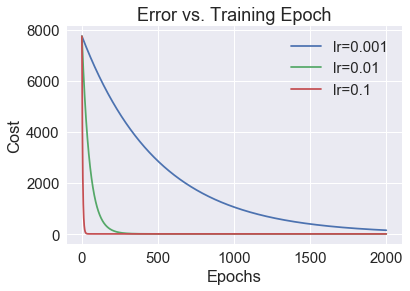

In [30]:
learning_rates=[0.001,0.01,0.1]
tolerance=0.02
epochs=2000

for learning_rate in learning_rates:
    ar=Airfoil(learning_rate, tolerance, epochs)
    W,costs=ar.train(X_train, y_train)
    y_pred=ar.predict(X_test)
    plotConvergence(epochs, costs,learning_rate)
   
plt.show()  

In [37]:
def plotConvergence2(epochs, costs,W):    
    plt.plot(np.arange(epochs), costs,label='W='+str(W))  
    plt.xlabel('Epochs')      
    plt.ylabel('Cost')  
    plt.title('Error vs. Training Epoch')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [40]:
random_states=[2489, 10000,2]

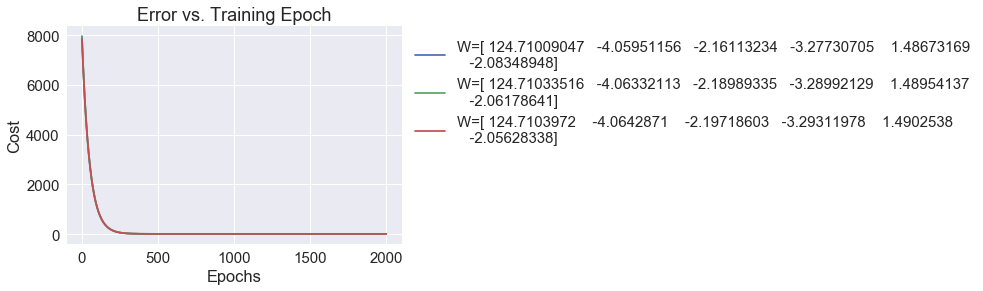

In [41]:
learning_rate=0.01 
for random_state in random_states:
    ar=Airfoil(learning_rate, tolerance, epochs,random_state)
    W,costs=ar.train(X_train, y_train)
    y_pred=ar.predict(X_test)
    plotConvergence2(epochs, costs,W)
   
plt.show()  

(a) When 0-0.5% of values are missing of that feature --> Ignore
(b) When 8-10% of values are missing of that feature
(c) When 60-70% of values are missing of that feature